cargar correctamente el archivo CSV y mostrar las primeras filas con head().

In [29]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import tabulate 

# Cargar el archivo CSV 
try:
    df = pd.read_csv("negocio.csv", delimiter=';', encoding='utf-8')  # Cambia el nombre del archivo según sea necesario
except UnicodeDecodeError:
    df = pd.read_csv("negocio.csv", delimiter=';', encoding='latin1')

In [30]:
print(df.head().to_markdown(index=False, stralign='center', numalign='center', tablefmt='heavy_grid'))


┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃  REFERENCIA  ┃     PRODUCTO     ┃  PRECIO  ┃  CATEGORIA   ┃  METODO DE PAGO  ┃  Unnamed: 5  ┃  Unnamed: 6  ┃  Unnamed: 7  ┃  Unnamed: 8  ┃  Unnamed: 9  ┃  Unnamed: 10  ┃  Unnamed: 11  ┃  Unnamed: 12  ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━┫
┃  Candoga/1   ┃       Dots       ┃    20    ┃   CADENAS    ┃   BANCOLOMABIA   ┃     nan      ┃     nan      ┃     nan      ┃     nan      ┃     nan      ┃      nan      ┃      nan      ┃      nan      ┃
┣━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━╋━━━━━━━━━━━━━━━╋━━━━━━━━━━━━━

agrupación de los datos por una columna relevante y aplicación de procesos adecuados sobre esta.

In [4]:
df['PRECIO'] = pd.to_numeric(df['PRECIO'], errors='coerce')

In [5]:
df.columns = df.columns.str.strip()
ventas_por_categoria = df.groupby('CATEGORIA')['PRECIO'].sum().reset_index()

graficos

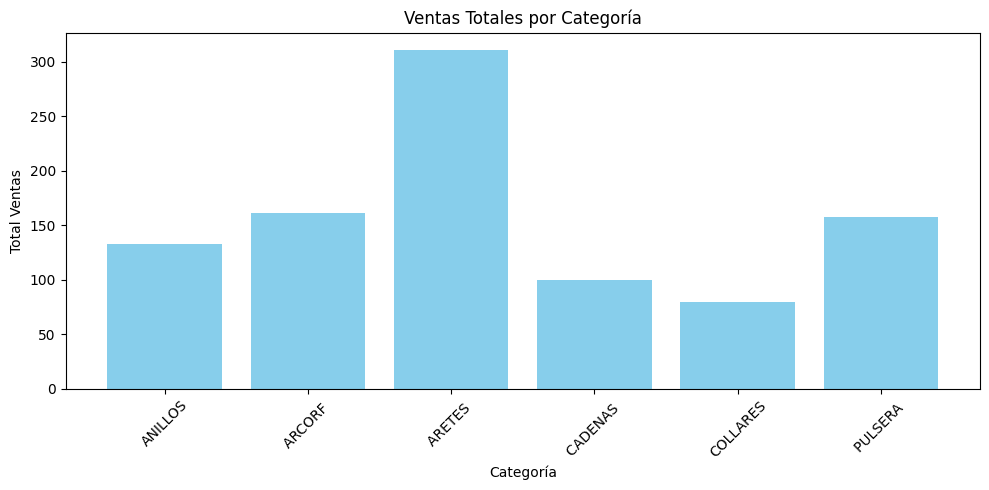

In [6]:
plt.figure(figsize=(10, 5))
plt.bar(ventas_por_categoria['CATEGORIA'], ventas_por_categoria['PRECIO'], color='skyblue')
plt.title('Ventas Totales por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Total Ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

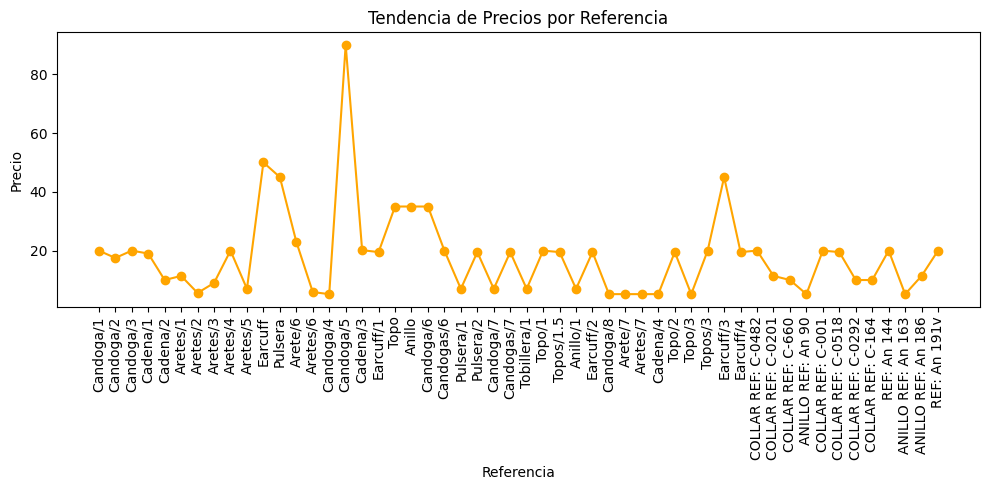

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(df['REFERENCIA'], df['PRECIO'], marker='o', linestyle='-', color='orange')
plt.title('Tendencia de Precios por Referencia')
plt.xlabel('Referencia')
plt.ylabel('Precio')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



calcular la media, mediana, moda, desviación estándar y varianza de alguna de las columnas numéricas del dataset utilizando NumPy.

In [8]:
media = np.mean(df['PRECIO'])
mediana = np.median(df['PRECIO'])
moda = stats.mode(df['PRECIO'])
varianza = np.var(df['PRECIO'])
desviacion_estandar = np.std(df['PRECIO'])

print('La media es:', media)
print('La mediana es:', mediana)
print('La varianza es:', varianza)
print('La desviación estándar es:', desviacion_estandar)


La media es: 18.114423076923078
La mediana es: 19.5
La varianza es: 217.39926312869824
La desviación estándar es: 14.744465508410206


DATOS RELEVANTES

In [10]:
metodo_pago_mas_usado = df['METODO DE PAGO'].mode()[0]
print('El metodo de pago mas usado es: ', metodo_pago_mas_usado)

El metodo de pago mas usado es:  BANCOLOMABIA 


In [31]:
producto_mas_caro = df.groupby('PRODUCTO')['PRODUCTO'].sum()
print('el producto mas caro es :', producto_mas_caro.max())

el producto mas caro es : Triple Trufa


ANALISIS FINAL

In [27]:
print("Análisis final:")
print("1. La media de los precios es:", media)
print("2. La mediana de los precios es:", mediana)
if isinstance(moda.mode, np.ndarray) and len(moda.mode) > 0:
    print("3. La moda de los precios es:", moda.mode[0], "y se repite", moda.count[0], "veces.")
else:
    print("3. No se encontró moda.")
    print("4. La varianza indica la dispersión de los precios, siendo:", varianza)
    print("5. La desviación estándar de los precios es:", desviacion_estandar)
    print("6. Se observan tendencias significativas en los precios a través de los gráficos generados.")


Análisis final:
1. La media de los precios es: 18.114423076923078
2. La mediana de los precios es: 19.5
3. La moda de los precios es: 20.0 y se repite 10 veces.
